___
# Ciência dos Dados - PROJETO 1

Eli Jose Abi Ghosn

___

## Evolução do acesso a internet nas regiões brasileiras: Renda per capita

___
## Introdução

Esse projeto tem como objetivo analisar qual região do Brasil teve o maior aumento no acesso a internet entre os anos de 2013, 2014 e 2015. Além disso, será também identificada em qual zona houve o maior aumento no acesso a internet, na rural ou urbana, e e a distribuição do acesso a internet entre as faixas de renda. Para isso será utilizado a base de dados da PNAD domicílio 2013, 2014 e 2015, sendo essas processadas por meio da seleção e tratramento das variáveis de interesse utilizando a biblioteca PANDAS do python.

___
## Análise e Resultados

In [218]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from numpy import arange

In [219]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\elijo\Downloads


In [239]:
#Se usar o arquivo descompactado
#pd.read_csv('DOM2015.csv',sep=',')

dados = pd.read_csv('DOM2015.csv',sep=',')

#regiao
dados.loc[(dados.UF<18), 'Regiao'] = 'Norte'
dados.loc[(dados.UF>20) & (dados.UF<30), 'Regiao'] = 'Nordeste'
dados.loc[(dados.UF>30) & (dados.UF<36), 'Regiao'] = 'Sudeste'
dados.loc[(dados.UF>40) & (dados.UF<44), 'Regiao'] = 'Sul'
dados.loc[(dados.UF>45), 'Regiao'] = 'Centro-Oeste'
dados.UF = dados.UF.astype('category')

dados = dados.loc[:,['V02322','V4105', 'Regiao','V4621']]

dados = dados[(dados.V02322<=4.0)]


dados.V02322 = dados.V02322.astype('category')


#zona
dados.loc[(dados.V4105<4),'Zona'] = 'Urbana'
dados.loc[(dados.V4105>3),'Zona'] = 'Rural'
dados.Zona = dados.Zona.astype('category')

#internet
dados=dados.rename(columns = {'V02322':'Internet'})
dados.Internet.cat.categories = ('Sim','Nao')


#renda
dados=dados.rename(columns = {'V4621':'Renda'})

dados = dados.loc[:,['Internet','Zona', 'Regiao','Renda']]

dados = dados[(dados.Renda!=999999999999)]

dados.head()
dados.Renda[(dados.Internet=='Nao') & (dados.Zona=='Rural')].describe()


count    12555.000000
mean       609.147909
std        729.009516
min          0.000000
25%        232.000000
50%        450.000000
75%        788.000000
max      30000.000000
Name: Renda, dtype: float64

In [255]:
# classes de renda

faixa = arange(0,30000,4)

r = pd.cut(dados.Renda[(dados.Internet=='Nao')&(dados.Zona=='Rural')], bins=faixa, right=False)
print('Frequências relativas:')
ut1 = (r.value_counts(sort=False, normalize=True)*100).round(decimals=10)
print(ut1,'\n')

Frequências relativas:
[0, 4)            0.462004
[4, 8)            0.015931
[8, 12)           0.023897
[12, 16)          0.079656
[16, 20)          0.055759
[20, 24)          0.055759
[24, 28)          0.151346
[28, 32)          0.183209
[32, 36)          0.215071
[36, 40)          0.605385
[40, 44)          0.278796
[44, 48)          0.286761
[48, 52)          0.493866
[52, 56)          0.294727
[56, 60)          0.414211
[60, 64)          0.462004
[64, 68)          0.493866
[68, 72)          0.342520
[72, 76)          0.454039
[76, 80)          0.605385
[80, 84)          0.414211
[84, 88)          0.414211
[88, 92)          0.469970
[92, 96)          0.398279
[96, 100)         0.406245
[100, 104)        0.868249
[104, 108)        0.438107
[108, 112)        0.438107
[112, 116)        0.446073
[116, 120)        0.398279
                    ...   
[29876, 29880)    0.000000
[29880, 29884)    0.000000
[29884, 29888)    0.000000
[29888, 29892)    0.000000
[29892, 29896)    0.000000
[2989

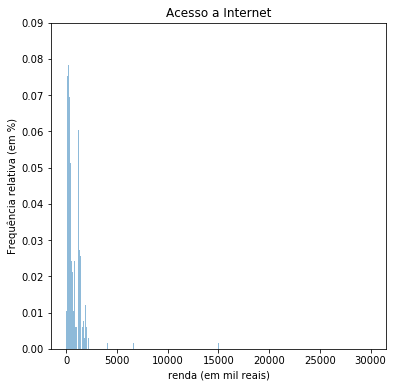

In [258]:
# Gráfico de colunas
from numpy import zeros_like
plot = dados.Renda[(dados.Internet=='Nao')&(dados.Zona=='Rural')].plot.hist(bins=faixa,title='Acesso a Internet', weights=zeros_like(dados.Renda[(dados.Internet=='Nao')&(dados.Zona=='Rural')])+1./dados.Renda[dados.Internet=='Sim'].size*100, figsize=(6, 6), alpha=0.5)
plt.ylabel('Frequência relativa (em %)')
plt.xlabel('renda (em mil reais)')
plt.ylim([0 ,0.09])
plt.show()

In [127]:
#frequencia absoluta internet
print('Frequências absolutas por Internet:')
t = dados.Internet.value_counts(sort=False)
print(t,'\n')

Frequências absolutas por Internet:
Sim    67834
Nao    49767
Name: Internet, dtype: int64 



In [128]:
#frequencia relativa internet
print('Frequências relativa por Internet:')
t = (dados.Internet.value_counts(sort=False, normalize=True)*100).round(decimals=1)
print(t,'\n')

Frequências relativa por Internet:
Sim    57.7
Nao    42.3
Name: Internet, dtype: float64 



Frequências relativas por Internet:


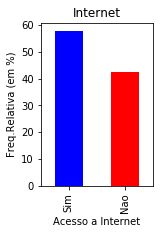

In [147]:
#grafico da frequencia absoluta de acesso a internet
print('Frequências relativas por Internet:')
g = (dados.Internet.value_counts(sort=False, normalize=True)*100).round(decimals=1)
plot = g.plot(kind='bar',title='Internet',figsize=(2, 3),color=('b','r'))
plt.ylabel('Freq.Relativa (em %)')
plt.xlabel('Acesso a Internet')

Frequências relativas por Regiao:


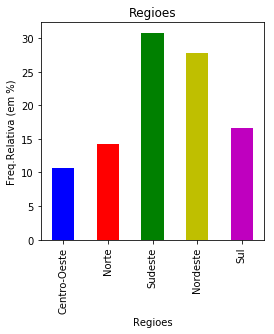

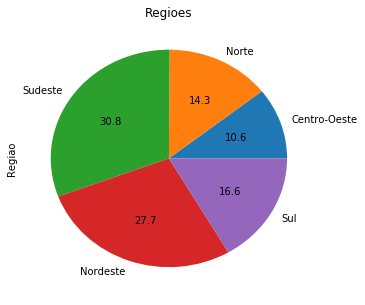

In [133]:
#grafico da frequencia relativa de Regiao

print('Frequências relativas por Regiao:')
g = (dados.Regiao.value_counts(sort=False, normalize=True)*100).round(decimals=1)

plot = g.plot(kind='bar',title='Regioes',figsize=(4, 4),color=('b','r','g','y','m'))
plt.ylabel('Freq.Relativa (em %)')
plt.xlabel('Regioes')



#grafico de pizza
fig = plt.figure(figsize=(18, 5))
plt.subplot(133)
plot = g.plot(kind='pie',title='Regioes',autopct='%.1f')
plt.show()

Frequências relativas por Zona:


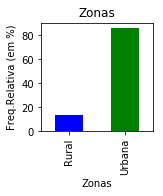

In [113]:
#grafico da frequencia relativa de Zona

print('Frequências relativas por Zona:')
ut1 = (dados.Zona.value_counts(sort=False, normalize=True)*100).round(decimals=1)

plot = ut1.plot(kind='bar',title='Zonas',figsize=(2, 2),color=('b','g'))
plt.ylabel('Freq.Relativa (em %)')
plt.xlabel('Zonas')

In [142]:
#tabela Internet por Regiao
#mostra a frequencia relativa a amostra total (%)
ct1=(pd.crosstab(dados.Regiao, dados.Internet, margins=True, rownames=['Internet'], colnames=['Regiao'], normalize='index')*100).round(decimals=1)
ct1

Regiao,Sim,Nao
Internet,,
Centro-Oeste,61.9,38.1
Nordeste,49.3,50.7
Norte,47.7,52.3
Sudeste,65.4,34.6
Sul,63.3,36.7
All,57.7,42.3


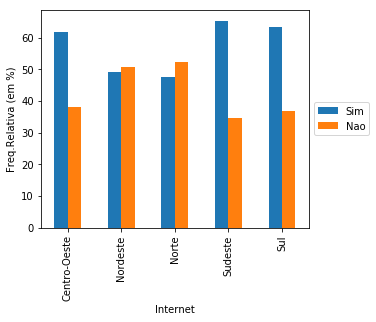

In [161]:
plot = ct1.iloc[0:5,0:2].plot(kind='bar')
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Freq.Relativa (em %)')
plt.show()

Internet       Sim   Nao   All
Regiao                        
Centro-Oeste  11.4   9.6  10.6
Nordeste      23.7  33.2  27.7
Norte         11.8  17.6  14.3
Sudeste       35.0  25.2  30.8
Sul           18.2  14.4  16.6


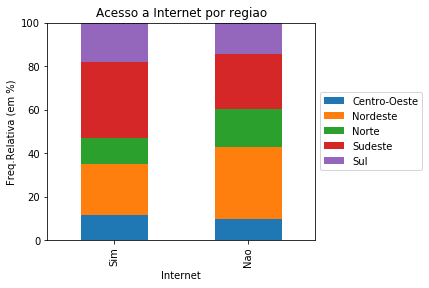

In [158]:
ct2 = (pd.crosstab(dados.Regiao,dados.Internet,margins=True,rownames=['Regiao'], colnames=['Internet'], normalize='columns')*100).round(decimals=1)
print(ct2)

plot = ct2.iloc[0:5,0:2].T.plot(kind='bar', stacked=True,title='Acesso a Internet por regiao')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em %)')
#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Zona      Rural  Urbana   All
Internet                     
Sim        20.8    63.6  57.7
Nao        79.2    36.4  42.3


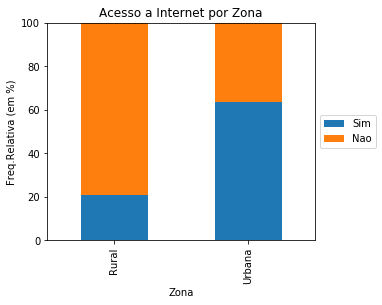

In [166]:
#Acesso a internet por zona rural e urbana


ct2 = (pd.crosstab(dados.Internet,dados.Zona,margins=True,rownames=['Internet'], colnames=['Zona'], normalize='columns')*100).round(decimals=1)
print(ct2)


plot = ct2.iloc[0:5,0:2].T.plot(kind='bar', stacked=True,title='Acesso a Internet por Zona')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em %)')
#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()




___
## Conclusão 

Descreva aqui suas conclusões!

In [28]:
cut.to_excel('stat1DOM15.xlsx')